#### A botanical company has hired you as a DS and your role is to create a model that can predict whether the given IRIS flower belongs to Setosa, Versicolor and Virginica

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
irisData = pd.read_csv("https://raw.githubusercontent.com/uiuc-cse/data-fa14/gh-pages/data/iris.csv")

In [4]:
#Check whether the data has any missing value
irisData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
species         150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [26]:
irisData.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [5]:
#Check whether the data is balanced or not
irisData.species.value_counts()

setosa        50
virginica     50
versicolor    50
Name: species, dtype: int64

In [6]:
#Metric for Generalization: Accuracy Score
#Metric for Quality Check/Approval: Accuracy Score
#Domain Required: Optional

In [7]:
#Seperate data as features and label
features = irisData.iloc[:,:-1].values
label = irisData.iloc[:,-1].values

#Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(features,
                                                label,
                                                test_size = 0.2,
                                                random_state = 13)

#Model Creation
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=7)
model.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=7, p=2,
           weights='uniform')

In [8]:
#Check Generalization
print(model.score(X_train,y_train))
print(model.score(X_test,y_test))

0.975
1.0


In [9]:
#Check the QUALITY of the model
#Since the dataset is balanced we can use the following two approaches to define whether we can accept or reject the model
#Technique1: Use Accuracy
#Technique2: Use ROC-AUC curve

In [18]:
#Technique1: Use Accuracy
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
#model.score(label, model.predict(features))
cm = confusion_matrix(label, model.predict(features))
cm

array([[50,  0,  0],
       [ 0, 49,  1],
       [ 0,  2, 48]], dtype=int64)

In [23]:
acc = (50+49+48)/(50+49+48+1+2)
print(str(acc * 100)+"% accuracy")

98.0% accuracy


In [25]:
#Technique2: Use ROC-AUC curve --- Balanced
#This dataset is a Multi-class classification use case. Thus we need to 3 ROC curve

In [50]:
from sklearn.multiclass import OneVsRestClassifier #This class will ensure will create model for multi labels
from sklearn.svm import LinearSVC
from sklearn.preprocessing import label_binarize #This will take care to binarize each label
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc

In [64]:
labelClass = pd.DataFrame(label)[0].unique()

In [52]:
y = label_binarize(label, classes=['setosa', 'versicolor', 'virginica'])


In [53]:
#Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(features,
                                                y,
                                                test_size = 0.2,
                                                random_state = 13)

In [54]:
#Create Model
model = OneVsRestClassifier(LinearSVC()) 
y_model = model.fit(X_train,y_train).decision_function(X_test)


In [58]:
#Compute ROC
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(0,3):
    fpr[i],tpr[i],threshold = roc_curve(y_test[:,i],y_model[:,i])
    roc_auc[i]= auc(fpr[i],tpr[i])

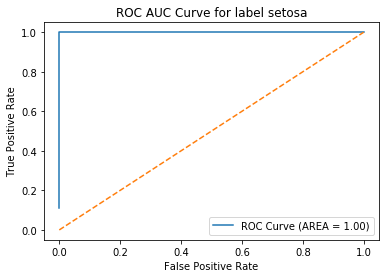

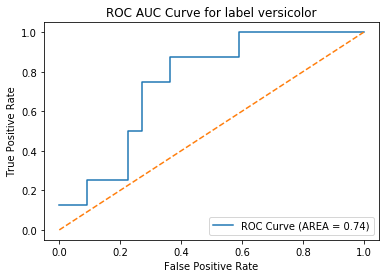

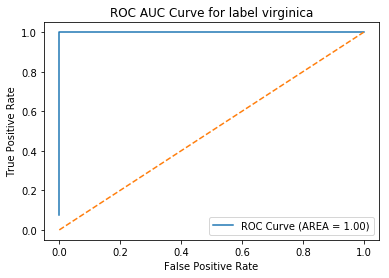

In [65]:
#Lets plot ROC
#There will be 3 ROC curves
labelClass = pd.DataFrame(label)[0].unique()

for i in range(0,3):
    plt.figure()
    plt.plot(fpr[i],tpr[i], label ='ROC Curve (AREA = %0.2f)' % roc_auc[i])
    plt.plot([0,1],[0,1], '--')
    plt.legend(loc="lower right")
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC AUC Curve for label {}'.format(labelClass[i]))

In [66]:
# Interest Purpose--- I dont recommend the below code 
# -- Prashant Nair
#use it at your own risk ;)

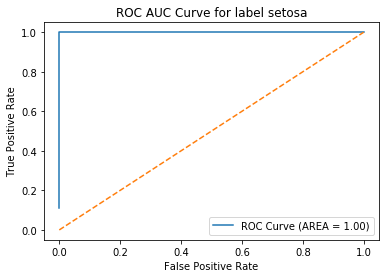

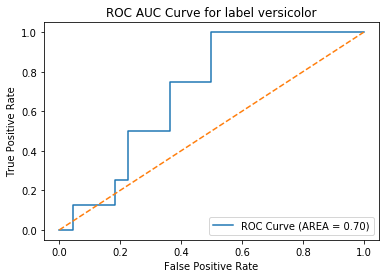

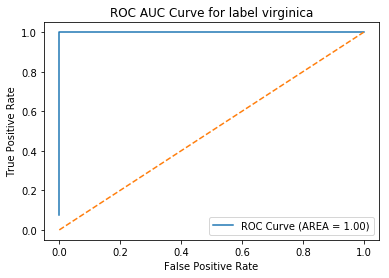

In [68]:
from sklearn.multiclass import OneVsRestClassifier #This class will ensure will create model for multi labels
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import label_binarize #This will take care to binarize each label
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc

y = label_binarize(label, classes=['setosa', 'versicolor', 'virginica'])

#Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(features,
                                                y,
                                                test_size = 0.2,
                                                random_state = 13)

#Create Model
model = OneVsRestClassifier(LogisticRegression()) 
y_model = model.fit(X_train,y_train).decision_function(X_test)

#Compute ROC
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(0,3):
    fpr[i],tpr[i],threshold = roc_curve(y_test[:,i],y_model[:,i])
    roc_auc[i]= auc(fpr[i],tpr[i])
    
#Lets plot ROC
#There will be 3 ROC curves
labelClass = pd.DataFrame(label)[0].unique()

for i in range(0,3):
    plt.figure()
    plt.plot(fpr[i],tpr[i], label ='ROC Curve (AREA = %0.2f)' % roc_auc[i])
    plt.plot([0,1],[0,1], '--')
    plt.legend(loc="lower right")
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC AUC Curve for label {}'.format(labelClass[i]))